In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import collections as co
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.snowball import RussianStemmer

In [5]:
#функции, которые нам сегодня пригодятся
def count_words(text):
    c_text = co.Counter(text)
    w=[]
    count_w=[]
    for i in c_text.most_common():
        w.append(i[0])
        count_w.append(i[1])
    words = pd.DataFrame({'words':w,'counts':count_w})
    return words

def draw_hist(words,counts):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.bar(range(len(words)), counts)
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words)
    ax.set_title('Most Popular Words')


In [6]:
#текст взят отсюда http://taom.academy/news/item/77 , просто потому что попался на глаза
data = pd.read_csv('./text.txt',sep='\t',header=None)

In [7]:
#очистка данных от цифр и приведение всех слов к нижнему регистру
data['text'] = data.iloc[:]

data['text'] = data['text'].str.replace('[0-9]+','')
data['text'] = data['text'].str.lower()
data['array'] = data['text'].str.split('\W+').tolist()

In [8]:
#делаем список из слов
text_array = data['array'].tolist()
text_array = np.concatenate( text_array, axis=0 )

In [9]:
text_array = list( text_array)
text_array = list(filter(str.strip, text_array))

In [10]:
new_text = count_words(text_array)

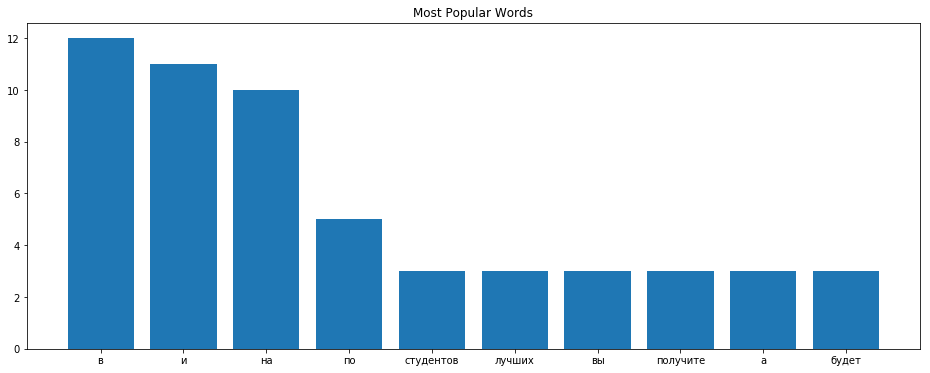

In [11]:
draw_hist(new_text.words[:10],new_text.counts[:10])

Итак, у нас получилось извлечь из текста информацию о самых популярных словах, но хорошо заметно, что в топ-10 словах присутствуют стоп-слова вроде "в", "на", "и" и тд, которые не несут смысловой нагрузки. Необходимо провести очистку от них!
<hr>
<p>Благо для этого есть инструменты, которые умеют работать с русским языком
</p>


In [12]:
#подгружаем стопслова со всех языков
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Home\sholodnickiy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
stopWords = nltk.corpus.stopwords.words()

In [14]:
#создаем два массива: один - с нашими словами, другой - со стопсловами
filter_df = pd.DataFrame({'words':text_array})
stop_df = pd.DataFrame({'words_stop':stopWords})

In [15]:
#выполняем соединение двух массивов по совпадающим словам в левой части
filter_df = pd.merge(filter_df
                    ,stop_df
                    ,how = 'left'
                    ,left_on = 'words'
                    ,right_on = 'words_stop'
                    )[:]

In [16]:
filter_df

,words,words_stop
0,информируем,NaN
1,вас,вас
2,о,о
3,о,о
4,о,о
5,том,том
6,что,что
7,в,в
8,рамках,NaN
9,открытой,NaN


In [17]:
#отфильтруем по всем совпадающим стопсловам
filter_df = filter_df[(filter_df.words_stop.isnull())][:]

In [18]:
#выбросим колонку из нанов
filter_df.drop(['words_stop'] , axis = 1 , inplace = True)

In [19]:
filter_df

,words
0,информируем
8,рамках
9,открытой
10,платформы
11,россия
12,страна
13,возможностей
14,проводится
15,олимпиада
17,студентов


In [20]:
text_array = filter_df['words'].values

In [21]:
words = count_words(text_array)

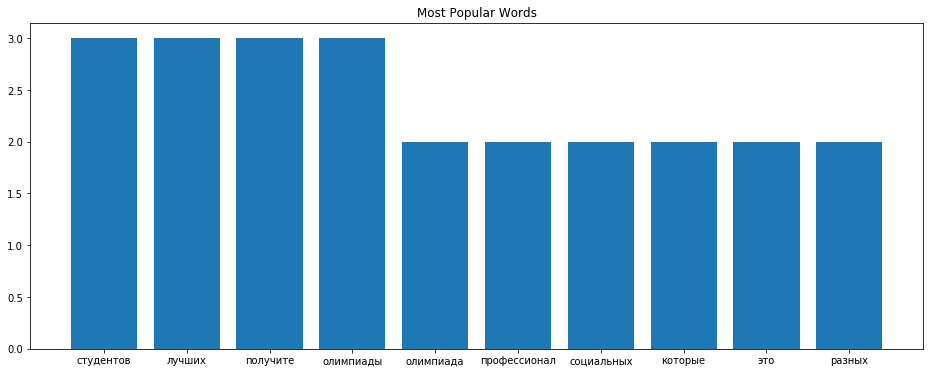

In [22]:
draw_hist(words.words[:10],words.counts[:10])

Как мы можем заметить, стопслова действительно исчезли, но если посмотреть на 4 и 5 строчку, видно, что по сути это одно и то же слово, однако у них раазные окончания, поэтому для полноты кортины нужно выполнить стемминг

In [23]:
stemming = RussianStemmer()

my_words = filter_df['words']
stemmed_list = [stemming.stem(word) if word not in stopWords else '' for word in my_words]

filter_df['stem_arr'] = stemmed_list

In [24]:
stemm_words_count = count_words(filter_df.stem_arr)

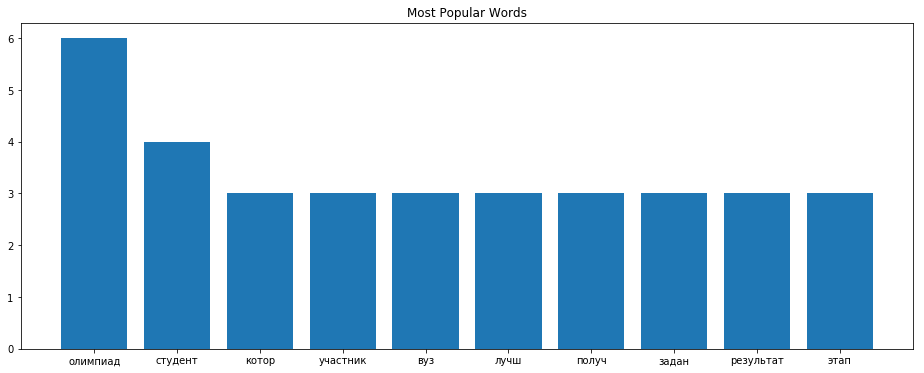

In [25]:
draw_hist(stemm_words_count.words[:10],stemm_words_count.counts[:10])

In [36]:
res = stemm_words_count.words.values
file = open('./'+str('result') + '.xls','w') 
file.write(str(res) ) 
file.close() 

Конечно, NLP-алгоритмы еще не идеально работают с русским языком, например, мы видме в топе слово "котор", которое скорее всего тоже можно отнести к стоп-словам.

Однако, в целом, результат получился удовлетворительный, ведь взглянув даже на топ-5 получившихся стемм, мы можем с большой уверенностью предположить, о чем этот текст